In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d mosapabdelghany/medical-insurance-cost-dataset -p /content/

Dataset URL: https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
License(s): CC0-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 62.2MB/s]


In [18]:
!unzip medical-insurance-cost-dataset.zip -d /content/

Archive:  medical-insurance-cost-dataset.zip
  inflating: /content/insurance.csv  


In [229]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Importando DataFrame

In [180]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Analise Exploratoria dos Dados


In [21]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [26]:
df.duplicated().sum()

np.int64(1)

In [28]:
df.shape

(1338, 7)

In [29]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


Text(0.5, 1.0, 'Distribuição de Custos')

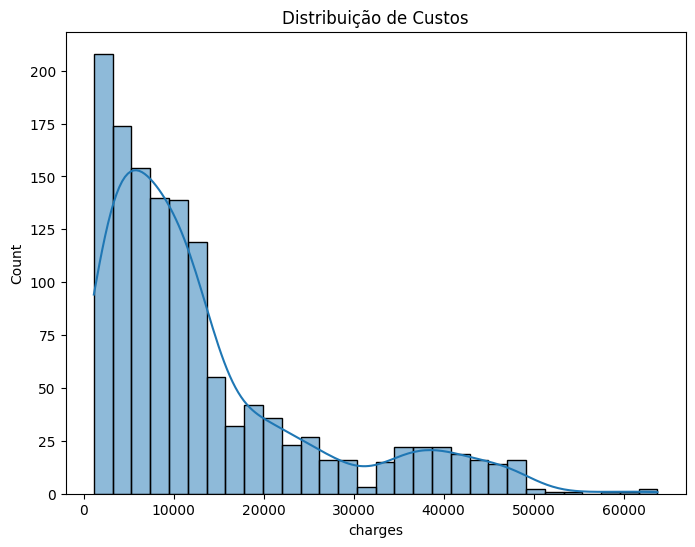

In [210]:
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde= True)
plt.title('Distribuição de Custos')

Text(0.5, 1.0, 'Distribuição de Idade')

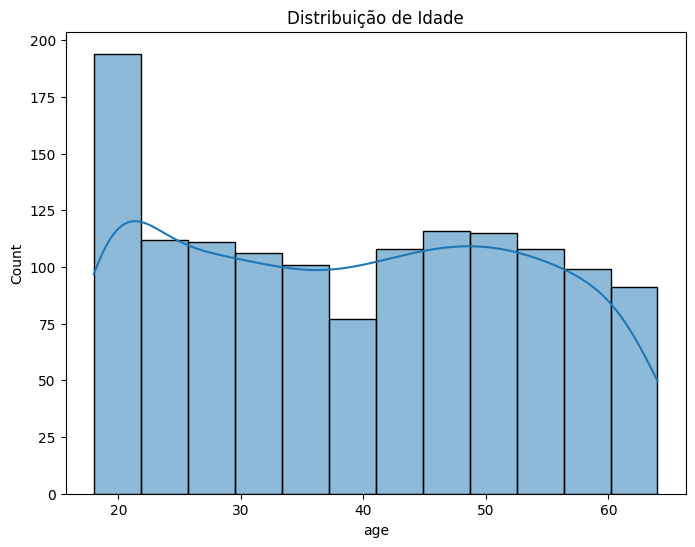

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde= True)
plt.title('Distribuição de Idade')


Text(0.5, 1.0, 'Distribuição de IMC')

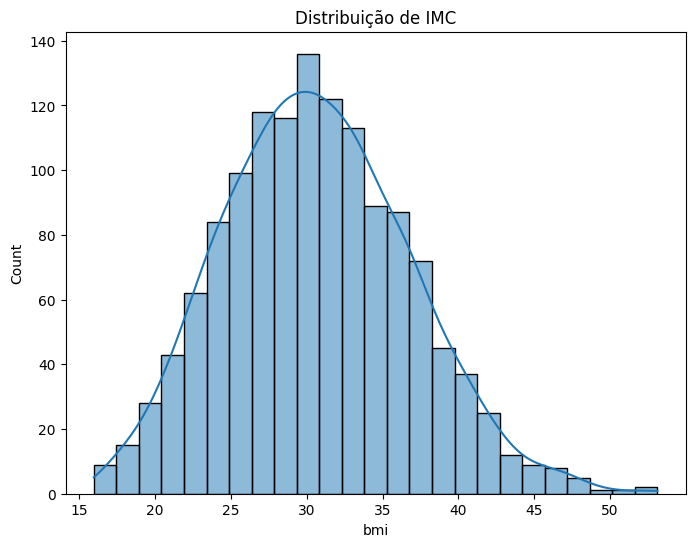

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde= True)
plt.title('Distribuição de IMC')

Text(0.5, 1.0, 'Distribuição de Número de Crianças')

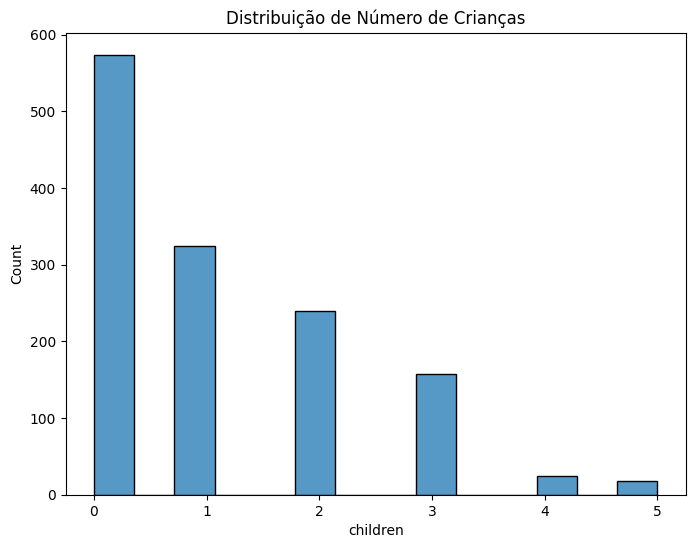

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df['children'])
plt.title('Distribuição de Número de Crianças')

Text(0.5, 1.0, 'Distribuição de Fumantes')

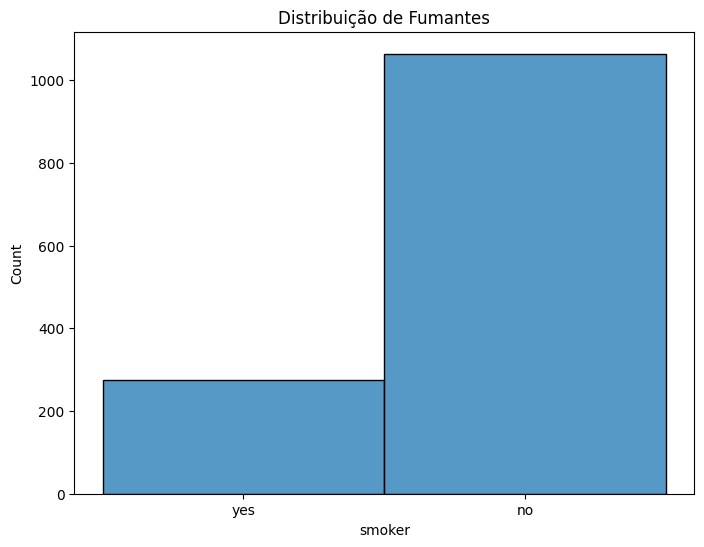

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(df['smoker'])
plt.title('Distribuição de Fumantes')

Text(0.5, 1.0, 'Distribuição de Gênero')

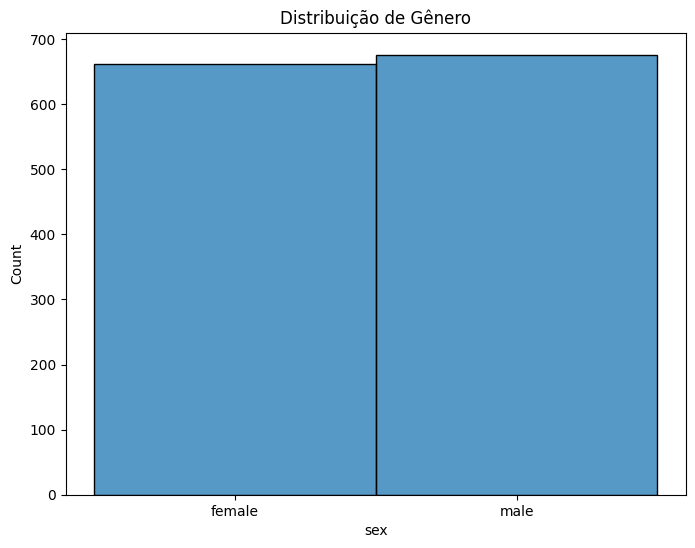

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sex'])
plt.title('Distribuição de Gênero')

Text(0.5, 1.0, 'Custo Médio por Região')

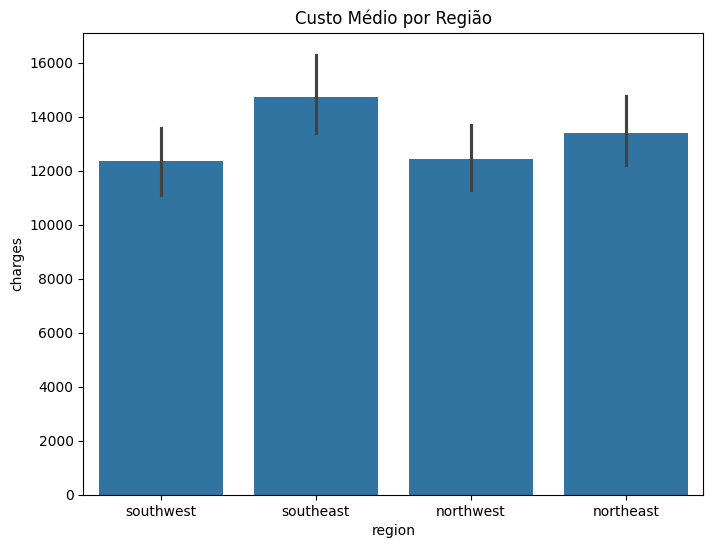

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges',data=df)
plt.title('Custo Médio por Região')

Text(0.5, 1.0, 'Relação entre Idade e Custo do Seguro (Destacado pelo Gênero)')

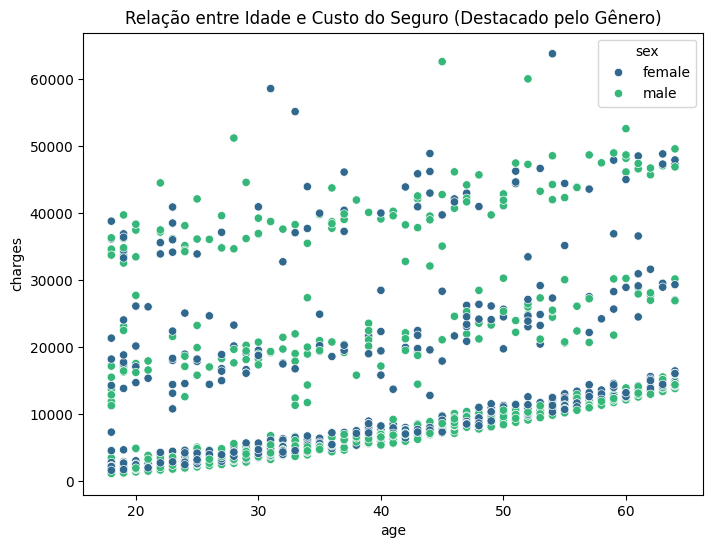

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue = 'sex', data=df, palette= 'viridis' )
plt.title('Relação entre Idade e Custo do Seguro (Destacado pelo Gênero)')

Text(0.5, 1.0, 'Relação entre Gênero e Custo do Seguro (Destacado se é Fumante ou Não)')

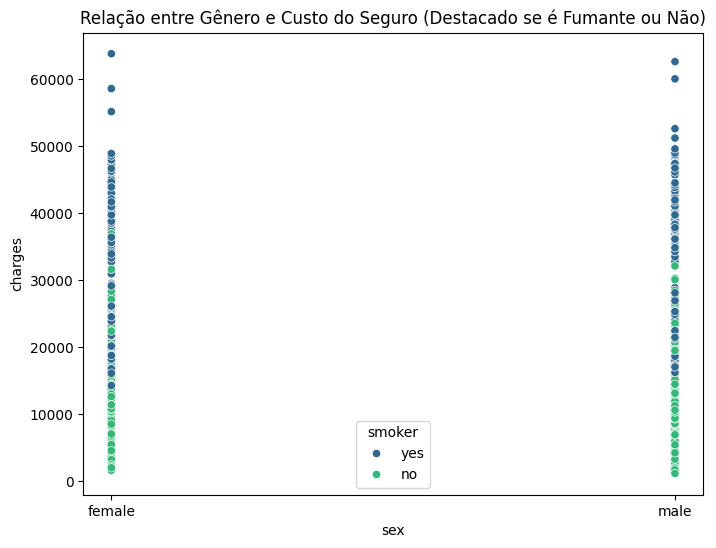

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sex', y='charges', hue = 'smoker', data=df, palette= 'viridis' )
plt.title('Relação entre Gênero e Custo do Seguro (Destacado se é Fumante ou Não)')

Text(0.5, 1.0, 'Relação entre IMC e Custo do Seguro (Destacado se é Fumante ou Não)')

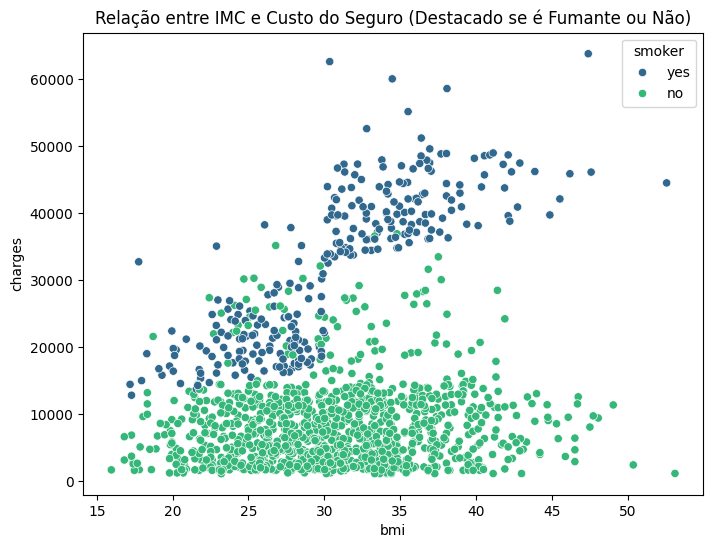

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue = 'smoker', data=df, palette= 'viridis' )
plt.title('Relação entre IMC e Custo do Seguro (Destacado se é Fumante ou Não)')

## Boxplot

Text(0.5, 1.0, 'Relação entre Fumantes e Custo do Seguro')

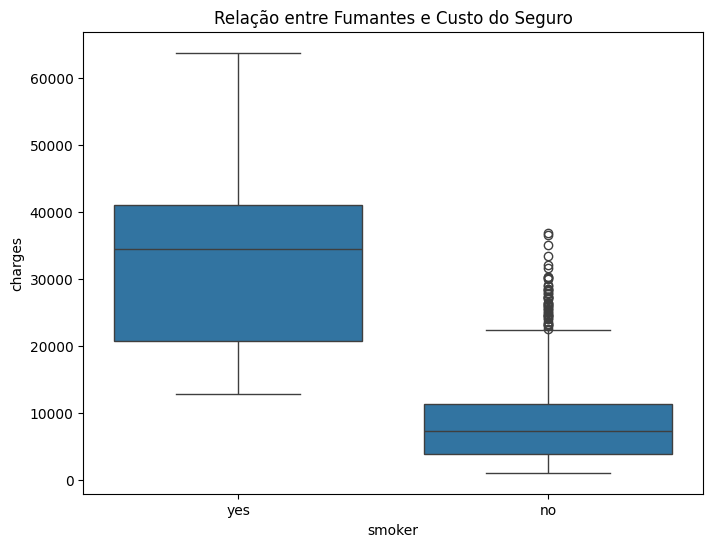

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Relação entre Fumantes e Custo do Seguro')

Text(0.5, 1.0, 'Relação entre Gênero e Custo do Seguro')

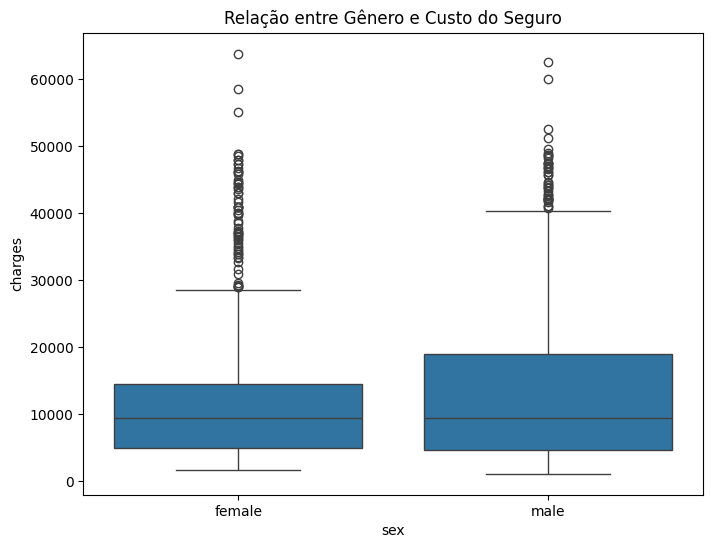

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Relação entre Gênero e Custo do Seguro')

# Pre-Processamento

In [219]:
enconder = OneHotEncoder()
df_encoded = pd.DataFrame(enconder.fit_transform(df[['sex', 'smoker', 'region']]).toarray())
df_encoded.columns = enconder.get_feature_names_out(['sex', 'smoker', 'region'])
df_encoded = pd.concat([df.drop(['sex', 'smoker', 'region'], axis=1), df_encoded], axis=1)

df_encoded

,age,bmi,children,charges,age_bmi,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,530.100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,607.860,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,924.000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,749.265,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,924.160,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1548.500,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,574.560,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,663.300,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,541.800,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [220]:
z_scores = np.abs(stats.zscore(df['charges']))
outliers_upper = df_encoded[z_scores > 3]  # valores a mais de 3 desvios padrão
outliers_lower = df_encoded[z_scores < -3]  # valores a menos de 3 desvios padrão

print(outliers_upper.count())
print(outliers_lower.count())

age                 7
bmi                 7
children            7
charges             7
age_bmi             7
sex_female          7
sex_male            7
smoker_no           7
smoker_yes          7
region_northeast    7
region_northwest    7
region_southeast    7
region_southwest    7
dtype: int64
age                 0
bmi                 0
children            0
charges             0
age_bmi             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


In [199]:
df_cleaned = df_encoded[z_scores <= 3]

df_cleaned['age_bmi'] = df_cleaned['age'] * df_cleaned['bmi']

df_cleaned.shape

/tmp/ipython-input-2024621927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_bmi'] = df_cleaned['age'] * df_cleaned['bmi']


(1331, 13)

Text(0.5, 1.0, 'Distribuição de Custos (depois do Z-Score)')

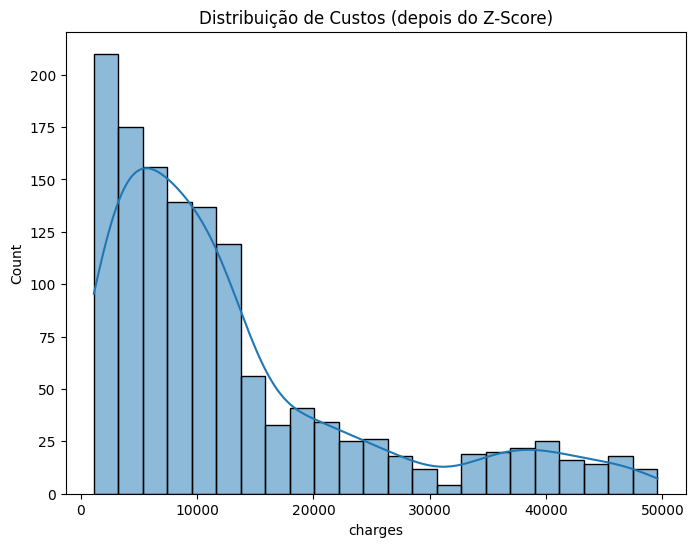

In [202]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['charges'], kde= True)
plt.title('Distribuição de Custos (depois do Z-Score)')

Text(0.5, 1.0, 'Matriz de Correlação')

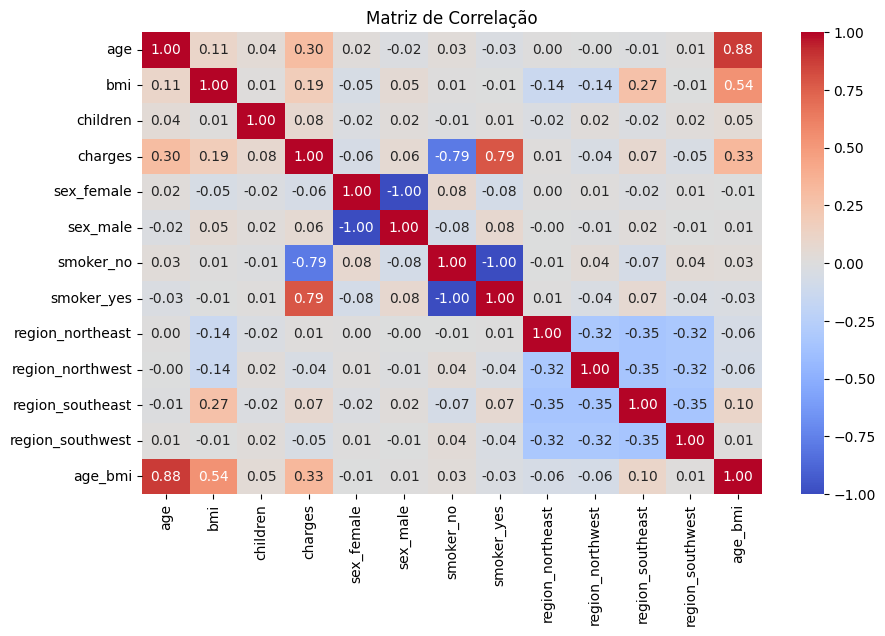

In [211]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')

# Modelagem

In [246]:
# Separando dados de features e target
X = df_cleaned.drop(columns=['charges'], axis=1)
y = df_cleaned['charges']

# Separando 20% para teste

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=200, random_state=42),
}

y_pred_linear = models['LinearRegression'].fit(X_train, y_train).predict(X_test)
y_pred_random = models['RandomForestRegressor'].fit(X_train, y_train).predict(X_test)

r2_score_linear = r2_score(y_test, y_pred_linear)
r2_score_random = r2_score(y_test, y_pred_random)

mean_absolute_error_linear = mean_absolute_error(y_test, y_pred_linear)
mean_absolute_error_random = mean_absolute_error(y_test, y_pred_random)

mean_absolute_percentage_error_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
mean_absolute_percentage_error_random = mean_absolute_percentage_error(y_test, y_pred_random)

print(f'R2 Score (LinearRegression): {r2_score_linear*100:.2f} %')
print(f'R2 Score (RandomForestRegressor): {r2_score_random*100:.2f} %')
print(f'Mean Absolute Error (LinearRegression): {mean_absolute_error_linear}')
print(f'Mean Absolute Error (RandomForestRegressor): {mean_absolute_error_random}')
print(f'Mean Absolute Percentage Error (LinearRegression): {mean_absolute_percentage_error_linear*100:.2f} %')
print(f'Mean Absolute Percentage Error (RandomForestRegressor): {mean_absolute_percentage_error_random*100:.2f} %')


R2 Score (LinearRegression): 72.70 %
R2 Score (RandomForestRegressor): 82.92 %
Mean Absolute Error (LinearRegression): 4301.793232211164
Mean Absolute Error (RandomForestRegressor): 2505.125493548589
Mean Absolute Percentage Error (LinearRegression): 52.85 %
Mean Absolute Percentage Error (RandomForestRegressor): 31.26 %


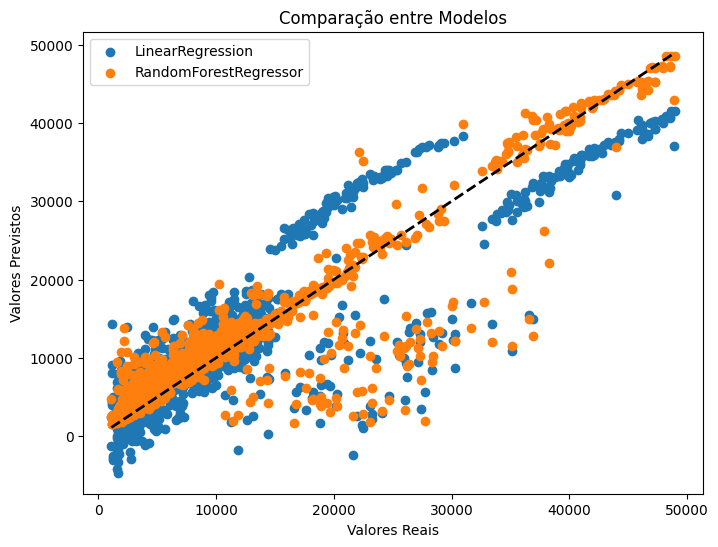

In [247]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_linear, label='LinearRegression')
plt.scatter(y_test, y_pred_random, label='RandomForestRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.title('Comparação entre Modelos')
plt.show()

# Teste com Dados Aleatórios

In [262]:
import numpy as np
import pandas as pd

# Gerar 100 registros de teste
n = 100

np.random.seed(42)

# Variáveis contínuas
age = np.random.randint(18, 65, n)            # idade entre 18 e 65
bmi = np.random.uniform(18, 40, n)            # IMC entre 18 e 40
children = np.random.randint(0, 6, n)         # nº de filhos entre 0 e 5

# Variáveis categóricas
smoker = np.random.choice(['yes', 'no'], n, p=[0.2, 0.8])   # 20% fumantes
sex = np.random.choice(['male', 'female'], n)
region = np.random.choice(['southeast', 'southwest', 'northeast', 'northwest'], n)

# Montar DataFrame
df_test = pd.DataFrame({
    'age': age,
    'bmi': bmi,
    'children': children,
    'sex': sex,
    'smoker': smoker,
    'region': region
})

print(df_test.head())

enconder

   age        bmi  children     sex smoker     region
0   56  24.456740         1    male     no  northwest
1   46  18.309756         2  female     no  northwest
2   32  22.374533         2    male     no  southwest
3   60  33.649523         3  female    yes  southeast
4   25  35.383862         3  female     no  northeast


OneHotEncoder()

In [263]:
import joblib

enconder = joblib.load('enconder.joblib')

df_test_encoded = pd.DataFrame(enconder.transform(df_test[['sex', 'smoker', 'region']]).toarray())
df_test_encoded.columns = enconder.get_feature_names_out(['sex', 'smoker', 'region'])
df_test_encoded = pd.concat([df_test.drop(['sex', 'smoker', 'region'], axis=1), df_test_encoded], axis=1)

df_test_final = df_test_encoded.copy()

df_test_final['age_bmi'] = df_test_final['age'] * df_test_final['bmi']

df_test_final

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_bmi
0,56,24.456740,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1369.577431
1,46,18.309756,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,842.248781
2,32,22.374533,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,715.985052
3,60,33.649523,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2018.971378
4,25,35.383862,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,884.596547
...,...,...,...,...,...,...,...,...,...,...,...,...
95,24,29.180373,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,700.328954
96,26,33.307882,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,866.004925
97,41,36.883894,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1512.239642
98,18,25.171096,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,453.079726


In [264]:
y_test_pred_linear = models['LinearRegression'].predict(df_test_final)
y_test_pred_random = models['RandomForestRegressor'].predict(df_test_final)


print(f'Custo Médio LinearRegression: {y_test_pred_linear.mean()}')
print(f'Custo Médio RandomForestRegressor: {y_test_pred_random.mean()}')

Custo Médio LinearRegression: 12769.08642909903
Custo Médio RandomForestRegressor: 13149.398628248498
